In [1]:
import polars as pl

dataset = pl.read_csv("../test_data/resin.csv")
index = dataset.get_column("")
dataset.drop_in_place(index.name)

print(dataset)

shape: (20, 6)
┌──────────┬────────────────┬────────────────┬────────────────┬─────────────┬──────┐
│ property ┆ raw material 1 ┆ raw material 2 ┆ raw material 3 ┆ temperature ┆ time │
│ ---      ┆ ---            ┆ ---            ┆ ---            ┆ ---         ┆ ---  │
│ f64      ┆ f64            ┆ f64            ┆ f64            ┆ i64         ┆ i64  │
╞══════════╪════════════════╪════════════════╪════════════════╪═════════════╪══════╡
│ 0.125    ┆ 0.5            ┆ 0.1            ┆ 0.4            ┆ 85          ┆ 80   │
│ 0.122    ┆ 0.7            ┆ 0.0            ┆ 0.3            ┆ 55          ┆ 50   │
│ 0.624    ┆ 0.0            ┆ 0.2            ┆ 0.8            ┆ 70          ┆ 40   │
│ 0.042    ┆ 0.9            ┆ 0.1            ┆ 0.0            ┆ 60          ┆ 90   │
│ 0.589    ┆ 0.2            ┆ 0.0            ┆ 0.8            ┆ 75          ┆ 120  │
│ …        ┆ …              ┆ …              ┆ …              ┆ …           ┆ …    │
│ 0.087    ┆ 0.5            ┆ 0.3            ┆ 0.2

Text(0, 0.5, 'frequency')

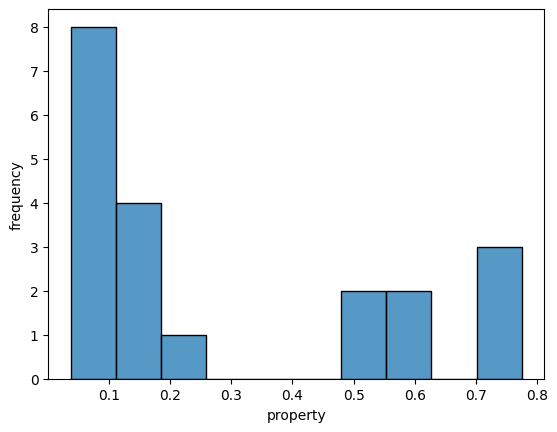

In [2]:
# 3.2 ヒストグラム
import seaborn as sns

var = "property"  # ヒストグラムを作成する変数名
number_of_bins = 10

axes = sns.histplot(
    data=dataset, x="property", bins=number_of_bins
)  # ヒストグラムの作成
axes.set_xlabel(var)  # 横軸の名前
axes.set_ylabel("frequency")  # 縦軸の名前

Text(0, 0.5, 'raw material 1')

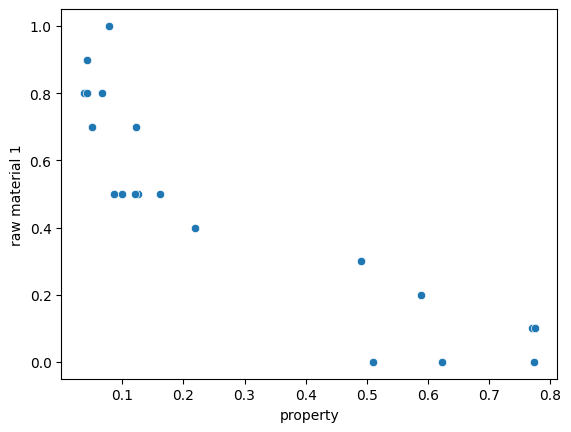

In [3]:
# 3.2 散布図

var_x = "property"  # 縦軸の変数名
var_y = "raw material 1"  # 横軸の変数名

axes = sns.scatterplot(dataset, x="property", y="raw material 1")  # 散布図の作成
axes.set_xlabel(var_x)  # 横軸の名前。ここでは、variable_number_1 番目の列の名前
axes.set_ylabel(var_y)  # 縦軸の名前。ここでは、variable_number_2 番目の列の名前

In [4]:
# 3.3 統計量の確認
stat_data = dataset.describe()
stat_data.write_csv("../output/resin_statistics.csv")
stat_data

statistic,property,raw material 1,raw material 2,raw material 3,temperature,time
str,f64,f64,f64,f64,f64,f64
"""count""",20.0,20.0,20.0,20.0,20.0,20.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",0.28925,0.465,0.12,0.415,72.25,55.5
"""std""",0.282036,0.319992,0.115166,0.328113,16.260624,35.015034
"""min""",0.037,0.0,0.0,0.0,50.0,10.0
"""25%""",0.079,0.2,0.0,0.1,60.0,40.0
"""50%""",0.125,0.5,0.1,0.3,70.0,50.0
"""75%""",0.511,0.7,0.2,0.7,85.0,80.0
"""max""",0.775,1.0,0.4,0.9,100.0,120.0


In [5]:
cov_data = dataset.select(
    [
        pl.concat([pl.cov(col1, col2) for col2 in dataset.columns])
        for col1 in dataset.columns
    ]
).insert_column(0, pl.Series("index", dataset.columns))
cov_data.write_csv("../output/resin_covariance.csv")
print(cov_data)

corr_data = dataset.corr().insert_column(0, pl.Series("index", dataset.columns))
corr_data.write_csv("../output/resin_correlation_coefficient.csv")
print(corr_data)

shape: (6, 7)
┌──────────────┬───────────┬──────────────┬──────────────┬─────────────┬─────────────┬─────────────┐
│ index        ┆ property  ┆ raw material ┆ raw material ┆ raw         ┆ temperature ┆ time        │
│ ---          ┆ ---       ┆ 1            ┆ 2            ┆ material 3  ┆ ---         ┆ ---         │
│ str          ┆ f64       ┆ ---          ┆ ---          ┆ ---         ┆ f64         ┆ f64         │
│              ┆           ┆ f64          ┆ f64          ┆ f64         ┆             ┆             │
╞══════════════╪═══════════╪══════════════╪══════════════╪═════════════╪═════════════╪═════════════╡
│ property     ┆ 0.079544  ┆ -0.080622    ┆ -0.007684    ┆ 0.088307    ┆ 0.242303    ┆ -2.279868   │
│ raw material ┆ -0.080622 ┆ 0.102395     ┆ -0.004       ┆ -0.098395   ┆ -0.496053   ┆ 2.518421    │
│ 1            ┆           ┆              ┆              ┆             ┆             ┆             │
│ raw material ┆ -0.007684 ┆ -0.004       ┆ 0.013263     ┆ -0.009263   ┆ 0.05

In [6]:
# 3.4 特徴量の標準化

dataset_wo_zero_std = dataset.select(
    [
        col
        for col in dataset.columns
        if dataset.select(pl.col(col).std()).item() not in [0, None]
    ]
)

# 特徴量の標準化
autoscaled_dataset = dataset_wo_zero_std.select(
    (pl.all() - pl.all().mean()) / pl.all().std()
)

print("標準化後の平均値")
print(autoscaled_dataset.mean())
print("\n標準化後の標準偏差")
print(autoscaled_dataset.std())
autoscaled_dataset.clone().insert_column(0, index).write_csv(
    "../output/autoscaled_dataset.csv"
)


標準化後の平均値
shape: (1, 6)
┌────────────┬────────────────┬────────────────┬────────────────┬─────────────┬─────────────┐
│ property   ┆ raw material 1 ┆ raw material 2 ┆ raw material 3 ┆ temperature ┆ time        │
│ ---        ┆ ---            ┆ ---            ┆ ---            ┆ ---         ┆ ---         │
│ f64        ┆ f64            ┆ f64            ┆ f64            ┆ f64         ┆ f64         │
╞════════════╪════════════════╪════════════════╪════════════════╪═════════════╪═════════════╡
│ 1.7764e-16 ┆ -6.6613e-17    ┆ 7.7716e-17     ┆ 2.0539e-16     ┆ 2.2204e-17  ┆ -1.1102e-17 │
└────────────┴────────────────┴────────────────┴────────────────┴─────────────┴─────────────┘

標準化後の標準偏差
shape: (1, 6)
┌──────────┬────────────────┬────────────────┬────────────────┬─────────────┬──────┐
│ property ┆ raw material 1 ┆ raw material 2 ┆ raw material 3 ┆ temperature ┆ time │
│ ---      ┆ ---            ┆ ---            ┆ ---            ┆ ---         ┆ ---  │
│ f64      ┆ f64            ┆ f64      

In [9]:
# 3.5 最小二乗法による回帰分析

from sklearn.linear_model import LinearRegression  # OLS モデルの構築に使用

# モデル構築 1. データセットの分割
y = dataset.get_column("property")  # 目的変数
x = dataset.drop(y.name)  # 説明変数

# モデル構築 2. 特徴量の標準化 (標準偏差が 0 の特徴量の削除)
x_wo_zero_std = x.select(
    [col for col in x.columns if x.select(pl.col(col).std()).item() not in [0, None]]
)
autoscaled_y = (y - y.mean()) / y.std()
autoscaled_x = x_wo_zero_std.select((pl.all() - pl.all().mean()) / pl.all().std())

# モデル構築 3. OLS による標準回帰係数の計算
model = LinearRegression()  # モデルの宣言
model.fit(autoscaled_x, autoscaled_y)  # モデルの構築

# 標準回帰係数
std_reg_coef = pl.DataFrame({"standard_regression_coefficients": model.coef_})
std_reg_coef.clone().insert_column(0, pl.Series("index", x.columns)).write_csv(
    "../output/standard_regression_coefficients_ols.csv"
)

# 今回はモデル構築に用いたデータセットと同じデータセットにおける Y の値を推定します
# 新しいデータの推定 1. モデル構築用のデータセットを用いた特徴量の標準化
autoscaled_x_new = (
    x - x_wo_zero_std.mean().select(pl.all().repeat_by(x.height).explode())
) / x_wo_zero_std.std().select(pl.all().repeat_by(x.height).explode())

# 新しいデータの推定 2. Y の値の推定
autoscaled_estimated_y_new = model.predict(autoscaled_x_new)

# 新しいデータの推定 3. 推定値のスケールをもとに戻す
estimated_y_new = autoscaled_estimated_y_new * y.std() + y.mean()
estimated_y_new = pl.Series("estimated_y", estimated_y_new)
estimated_y_new.to_frame().insert_column(0, index).write_csv(
    "../output/estimated_y_ols.csv"
)

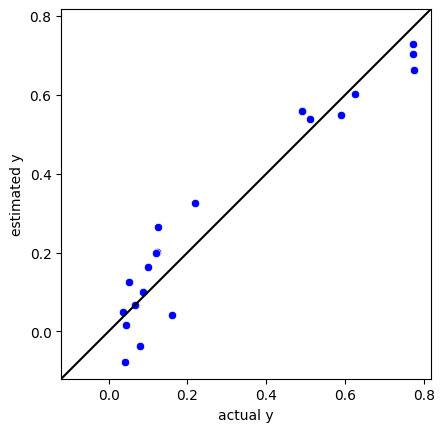

In [ ]:
# 実測値 vs. 推定値のプロット
ax = sns.scatterplot(x=y, y=estimated_y_new, color="blue")
# 実測値の最大値と、推定値の最大値の中で、より大きい値を取得
y_max = max(y.max(), estimated_y_new.max())
# 実測値の最小値と、推定値の最小値の中で、より小さい値を取得
y_min = min(y.min(), estimated_y_new.min())
# 取得した最小値-5%から最大値+5%まで、対角線を作成
range = 0.05 * (y_max - y_min)
ax.plot([y_min - range, y_max + range], [y_min - range, y_max + range], "k-")

ax.set_ylim(y_min - range, y_max + range)  # y 軸の範囲の設定
ax.set_xlim(y_min - range, y_max + range)  # x 軸の範囲の設定
ax.set_xlabel("actual y")  # x 軸の名前
ax.set_ylabel("estimated y")  # y 軸の名前
ax.set_aspect("equal", adjustable="box")  # 図の形を正方形に


In [ ]:
from sklearn.metrics import (  # r^2, RMSE, MAE の計算に使用
    mean_absolute_error,
    mean_squared_error,
    r2_score,
)
from sklearn.model_selection import (
    train_test_split,  # トレーニングデータとテストデータに分割するときに使用
)

num_of_test_samples = 5  # テストデータのサンプル数

# データ分割
y = dataset.get_column("property")  # 目的変数
x = dataset.drop(y.name)  # 説明変数

# ランダムにトレーニングデータとテストデータとに分割
# random_state に数字を与えることで、別のときに同じ数字を使えば、ランダムとはいえ同じ結果にすることができます
if num_of_test_samples:
    x_train, x_test, y_train, y_test = train_test_split(
        x, y, test_size=num_of_test_samples, shuffle=True, random_state=99
    )
else:
    x_train = x.clone()
    x_test = x.clone()
    y_train = y.clone()
    y_test = y.clone()


# 標準偏差が 0 の特徴量の削除
zero_stdev_cols = [
    col for col in x.columns if x.select(pl.col(col).std()).item() not in [0, None]
]
x_train = x_train.drop(zero_stdev_cols)
x_test = x_test.drop(zero_stdev_cols)

# オートスケーリング
autoscaled_y_train = (y_train - y_train.mean()) / y_train.std()
autoscaled_x_train = x_train.select((pl.all() - pl.all().mean()) / pl.all().std())

# モデル構築
model = LinearRegression()  # モデルの宣言
model.fit(autoscaled_x_train, autoscaled_y_train)  # モデル構築

# 標準回帰係数
std_regr_coef = pl.Series("standard_regression_coefficients", model.coef_)
std_regr_coef.clone().insert_column(0, index).to_csv(
    "standard_regression_coefficients_ols.csv"
)  # csv ファイルに保存。同じ名前のファイルがあるときは上書きされますので注意してください

# トレーニングデータの推定
autoscaled_estimated_y_train = model.predict(autoscaled_x_train)  # y の推定
estimated_y_train = (  # スケールをもとに戻す
    autoscaled_estimated_y_train * y_train.std() + y_train.mean()
)
estimated_y_train = pl.DataFrame(
    estimated_y_train, index=x_train.index, columns=["estimated_y"]
)

# トレーニングデータの実測値 vs. 推定値のプロット
plt.rcParams["font.size"] = 18
plt.scatter(
    y_train, estimated_y_train.iloc[:, 0], c="blue"
)  # 実測値 vs. 推定値プロット
y_max = max(
    y_train.max(), estimated_y_train.iloc[:, 0].max()
)  # 実測値の最大値と、推定値の最大値の中で、より大きい値を取得
y_min = min(
    y_train.min(), estimated_y_train.iloc[:, 0].min()
)  # 実測値の最小値と、推定値の最小値の中で、より小さい値を取得
plt.plot(
    [y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)],
    [y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)],
    "k-",
)  # 取得した最小値-5%から最大値+5%まで、対角線を作成
plt.ylim(
    y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)
)  # y 軸の範囲の設定
plt.xlim(
    y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)
)  # x 軸の範囲の設定
plt.xlabel("actual y")  # x 軸の名前
plt.ylabel("estimated y")  # y 軸の名前
plt.gca().set_aspect("equal", adjustable="box")  # 図の形を正方形に
plt.show()  # 以上の設定で描画

# トレーニングデータのr2, RMSE, MAE
print("r^2 for training data :", r2_score(y_train, estimated_y_train))
print(
    "RMSE for training data :",
    mean_squared_error(y_train, estimated_y_train, squared=False),
)
print("MAE for training data :", mean_absolute_error(y_train, estimated_y_train))

# トレーニングデータの結果の保存
y_train_for_save = pd.DataFrame(y_train)
y_train_for_save.columns = ["actual_y"]
y_error_train = y_train_for_save.iloc[:, 0] - estimated_y_train.iloc[:, 0]
y_error_train = pd.DataFrame(y_error_train)
y_error_train.columns = ["error_of_y(actual_y-estimated_y)"]
results_train = pd.concat(
    [y_train_for_save, estimated_y_train, y_error_train], axis=1
)  # 結合
results_train.to_csv(
    "estimated_y_train_in_detail_ols.csv"
)  # 推定値を csv ファイルに保存。同じ名前のファイルがあるときは上書きされますので注意してください

# テストデータの、トレーニングデータを用いたオートスケーリング
autoscaled_x_test = (x_test - x_train.mean()) / x_train.std()

# テストデータの推定
autoscaled_estimated_y_test = model.predict(autoscaled_x_test)  # y の推定
estimated_y_test = (
    autoscaled_estimated_y_test * y_train.std() + y_train.mean()
)  # スケールをもとに戻す
estimated_y_test = pd.DataFrame(
    estimated_y_test, index=x_test.index, columns=["estimated_y"]
)

# テストデータの実測値 vs. 推定値のプロット
plt.rcParams["font.size"] = 18
plt.scatter(y_test, estimated_y_test.iloc[:, 0], c="blue")  # 実測値 vs. 推定値プロット
y_max = max(
    y_test.max(), estimated_y_test.iloc[:, 0].max()
)  # 実測値の最大値と、推定値の最大値の中で、より大きい値を取得
y_min = min(
    y_test.min(), estimated_y_test.iloc[:, 0].min()
)  # 実測値の最小値と、推定値の最小値の中で、より小さい値を取得
plt.plot(
    [y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)],
    [y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)],
    "k-",
)  # 取得した最小値-5%から最大値+5%まで、対角線を作成
plt.ylim(
    y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)
)  # y 軸の範囲の設定
plt.xlim(
    y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)
)  # x 軸の範囲の設定
plt.xlabel("actual y")  # x 軸の名前
plt.ylabel("estimated y")  # y 軸の名前
plt.gca().set_aspect("equal", adjustable="box")  # 図の形を正方形に
plt.show()  # 以上の設定で描画

# テストデータのr2, RMSE, MAE
print("r^2 for test data :", r2_score(y_test, estimated_y_test))
print(
    "RMSE for test data :", mean_squared_error(y_test, estimated_y_test, squared=False)
)
print("MAE for test data :", mean_absolute_error(y_test, estimated_y_test))

# テストデータの結果の保存
y_test_for_save = pd.DataFrame(y_test)
y_test_for_save.columns = ["actual_y"]
y_error_test = y_test_for_save.iloc[:, 0] - estimated_y_test.iloc[:, 0]
y_error_test = pd.DataFrame(y_error_test)
y_error_test.columns = ["error_of_y(actual_y-estimated_y)"]
results_test = pd.concat(
    [y_test_for_save, estimated_y_test, y_error_test], axis=1
)  # 結合
results_test.to_csv(
    "estimated_y_test_in_detail_ols.csv"
)  # 推定値を csv ファイルに保存。同じ名前のファイルがあるときは上書きされますので注意してください


TypeError: list indices must be integers or slices, not DataFrame

In [ ]:
from sklearn.metrics import (  # r^2, RMSE, MAE の計算に使用
    mean_absolute_error,
    mean_squared_error,
    r2_score,
)
from sklearn.model_selection import (  # クロスバリデーションをするときに使用
    KFold,
    cross_val_predict,
)

fold_number = 10  # クロスバリデーションの fold 数

dataset = pd.read_csv("resin.csv", index_col=0, header=0)

# データ分割
y = dataset.iloc[:, 0]  # 目的変数
x = dataset.iloc[:, 1:]  # 説明変数

# 標準偏差が 0 の特徴量の削除
deleting_variables = x.columns[x.std() == 0]
x = x.drop(deleting_variables, axis=1)

# オートスケーリング
autoscaled_y = (y - y.mean()) / y.std()
autoscaled_x = (x - x.mean()) / x.std()

# モデル構築
model = LinearRegression()  # モデルの宣言
model.fit(autoscaled_x, autoscaled_y)  # モデル構築

# 標準回帰係数
std_regr_coef = pd.DataFrame(
    model.coef_, index=x.columns, columns=["standard_regression_coefficients"]
)
std_regr_coef.to_csv(
    "standard_regression_coefficients_ols.csv"
)  # csv ファイルに保存。同じ名前のファイルがあるときは上書きされますので注意してください

# トレーニングデータの推定
autoscaled_estimated_y = model.predict(autoscaled_x)  # y の推定
estimated_y = autoscaled_estimated_y * y.std() + y.mean()  # スケールをもとに戻す
estimated_y = pd.DataFrame(estimated_y, index=x.index, columns=["estimated_y"])

# トレーニングデータの実測値 vs. 推定値のプロット
plt.rcParams["font.size"] = 18
plt.scatter(y, estimated_y.iloc[:, 0], c="blue")  # 実測値 vs. 推定値プロット
y_max = max(
    y.max(), estimated_y.iloc[:, 0].max()
)  # 実測値の最大値と、推定値の最大値の中で、より大きい値を取得
y_min = min(
    y.min(), estimated_y.iloc[:, 0].min()
)  # 実測値の最小値と、推定値の最小値の中で、より小さい値を取得
plt.plot(
    [y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)],
    [y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)],
    "k-",
)  # 取得した最小値-5%から最大値+5%まで、対角線を作成
plt.ylim(
    y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)
)  # y 軸の範囲の設定
plt.xlim(
    y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)
)  # x 軸の範囲の設定
plt.xlabel("actual y")  # x 軸の名前
plt.ylabel("estimated y")  # y 軸の名前
plt.gca().set_aspect("equal", adjustable="box")  # 図の形を正方形に
plt.show()  # 以上の設定で描画

# トレーニングデータのr2, RMSE, MAE
print("r^2 for training data :", r2_score(y, estimated_y))
print("RMSE for training data :", mean_squared_error(y, estimated_y, squared=False))
print("MAE for training data :", mean_absolute_error(y, estimated_y))

# トレーニングデータの結果の保存
y_for_save = pd.DataFrame(y)
y_for_save.columns = ["actual_y"]
y_error_train = y_for_save.iloc[:, 0] - estimated_y.iloc[:, 0]
y_error_train = pd.DataFrame(y_error_train)
y_error_train.columns = ["error_of_y(actual_y-estimated_y)"]
results_train = pd.concat([y_for_save, estimated_y, y_error_train], axis=1)  # 結合
results_train.to_csv(
    "estimated_y_in_detail_ols.csv"
)  # 推定値を csv ファイルに保存。同じ名前のファイルがあるときは上書きされますので注意してください

# クロスバリデーションによる y の値の推定
cross_validation = KFold(
    n_splits=fold_number, random_state=9, shuffle=True
)  # クロスバリデーションの分割の設定
autoscaled_estimated_y_in_cv = cross_val_predict(
    model, autoscaled_x, autoscaled_y, cv=cross_validation
)  # y の推定
estimated_y_in_cv = (
    autoscaled_estimated_y_in_cv * y.std() + y.mean()
)  # スケールをもとに戻す
estimated_y_in_cv = pd.DataFrame(
    estimated_y_in_cv, index=x.index, columns=["estimated_y"]
)

# クロスバリデーションにおける実測値 vs. 推定値のプロット
plt.rcParams["font.size"] = 18
plt.scatter(y, estimated_y_in_cv.iloc[:, 0], c="blue")  # 実測値 vs. 推定値プロット
y_max = max(
    y.max(), estimated_y_in_cv.iloc[:, 0].max()
)  # 実測値の最大値と、推定値の最大値の中で、より大きい値を取得
y_min = min(
    y.min(), estimated_y_in_cv.iloc[:, 0].min()
)  # 実測値の最小値と、推定値の最小値の中で、より小さい値を取得
plt.plot(
    [y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)],
    [y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)],
    "k-",
)  # 取得した最小値-5%から最大値+5%まで、対角線を作成
plt.ylim(
    y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)
)  # y 軸の範囲の設定
plt.xlim(
    y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)
)  # x 軸の範囲の設定
plt.xlabel("actual y")  # x 軸の名前
plt.ylabel("estimated y")  # y 軸の名前
plt.gca().set_aspect("equal", adjustable="box")  # 図の形を正方形に
plt.show()  # 以上の設定で描画

# クロスバリデーションにおけるr2, RMSE, MAE
print("r^2 in cross-validation :", r2_score(y, estimated_y_in_cv))
print(
    "RMSE in cross-validation :",
    mean_squared_error(y, estimated_y_in_cv, squared=False),
)
print("MAE in cross-validation :", mean_absolute_error(y, estimated_y_in_cv))

# クロスバリデーションの結果の保存
y_error_in_cv = y_for_save.iloc[:, 0] - estimated_y_in_cv.iloc[:, 0]
y_error_in_cv = pd.DataFrame(y_error_in_cv)
y_error_in_cv.columns = ["error_of_y(actual_y-estimated_y)"]
results_in_cv = pd.concat(
    [y_for_save, estimated_y_in_cv, y_error_in_cv], axis=1
)  # 結合
results_in_cv.to_csv(
    "estimated_y_in_cv_in_detail_ols.csv"
)  # 推定値を csv ファイルに保存。同じ名前のファイルがあるときは上書きされますので注意してください
